In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
path = 'train.csv'
df = pd.read_csv(path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


SibSp = tem familiares a bordo
Parch = foi acompanhado.

## Entendimento dos dados

Toda essa parte praticamente não foi dada na aula. O professor havia dito que poderia remover ticket e nome e passengerID, pois eles não demonstravam correlação com a chance de sobreviver. (Faz sentido, afinal, o nome de alguém é único, assim como seu ID, e seu ticket, então não devem afetar se sobrevivem ou não.) Cabine também foi removida, pois não teria como substituir os valores nulos por algo significativo.

Mas o comentário foi se "estes tickets possuem certas informações", por exemplo, os 3 primeiros números do ticket dizem a cabine, daí seria importante manter, já que quem tem cabine mais perto dos botes salva-vidas tem mais chances de sobreviver, etc.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

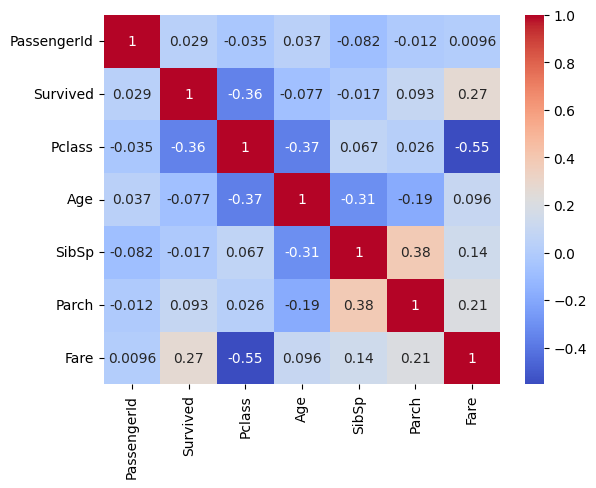

In [28]:
corr_original = df.select_dtypes(include='number').dropna().corr()
sns.heatmap(corr_original, annot=True, cmap='coolwarm')

Vamos focar na nossa *target*: Survived.
Vemos as menores |correlações|:
- PassengerId : 0.005
- SibSp : 0.035
- Parch: 0.082
- Age: 0.077

Lembramos de algo sobre "crianças entram primeiro no barco salva-vidas". Isso aparenta a ser mentira. Vamos reexplorar isso depois de substituir com NaN.

Outras colunas que não conseguimos observar, devido a seu dtype, é a Ticket, Cabin, Fare. Vamos 

<Figure size 100x100 with 0 Axes>

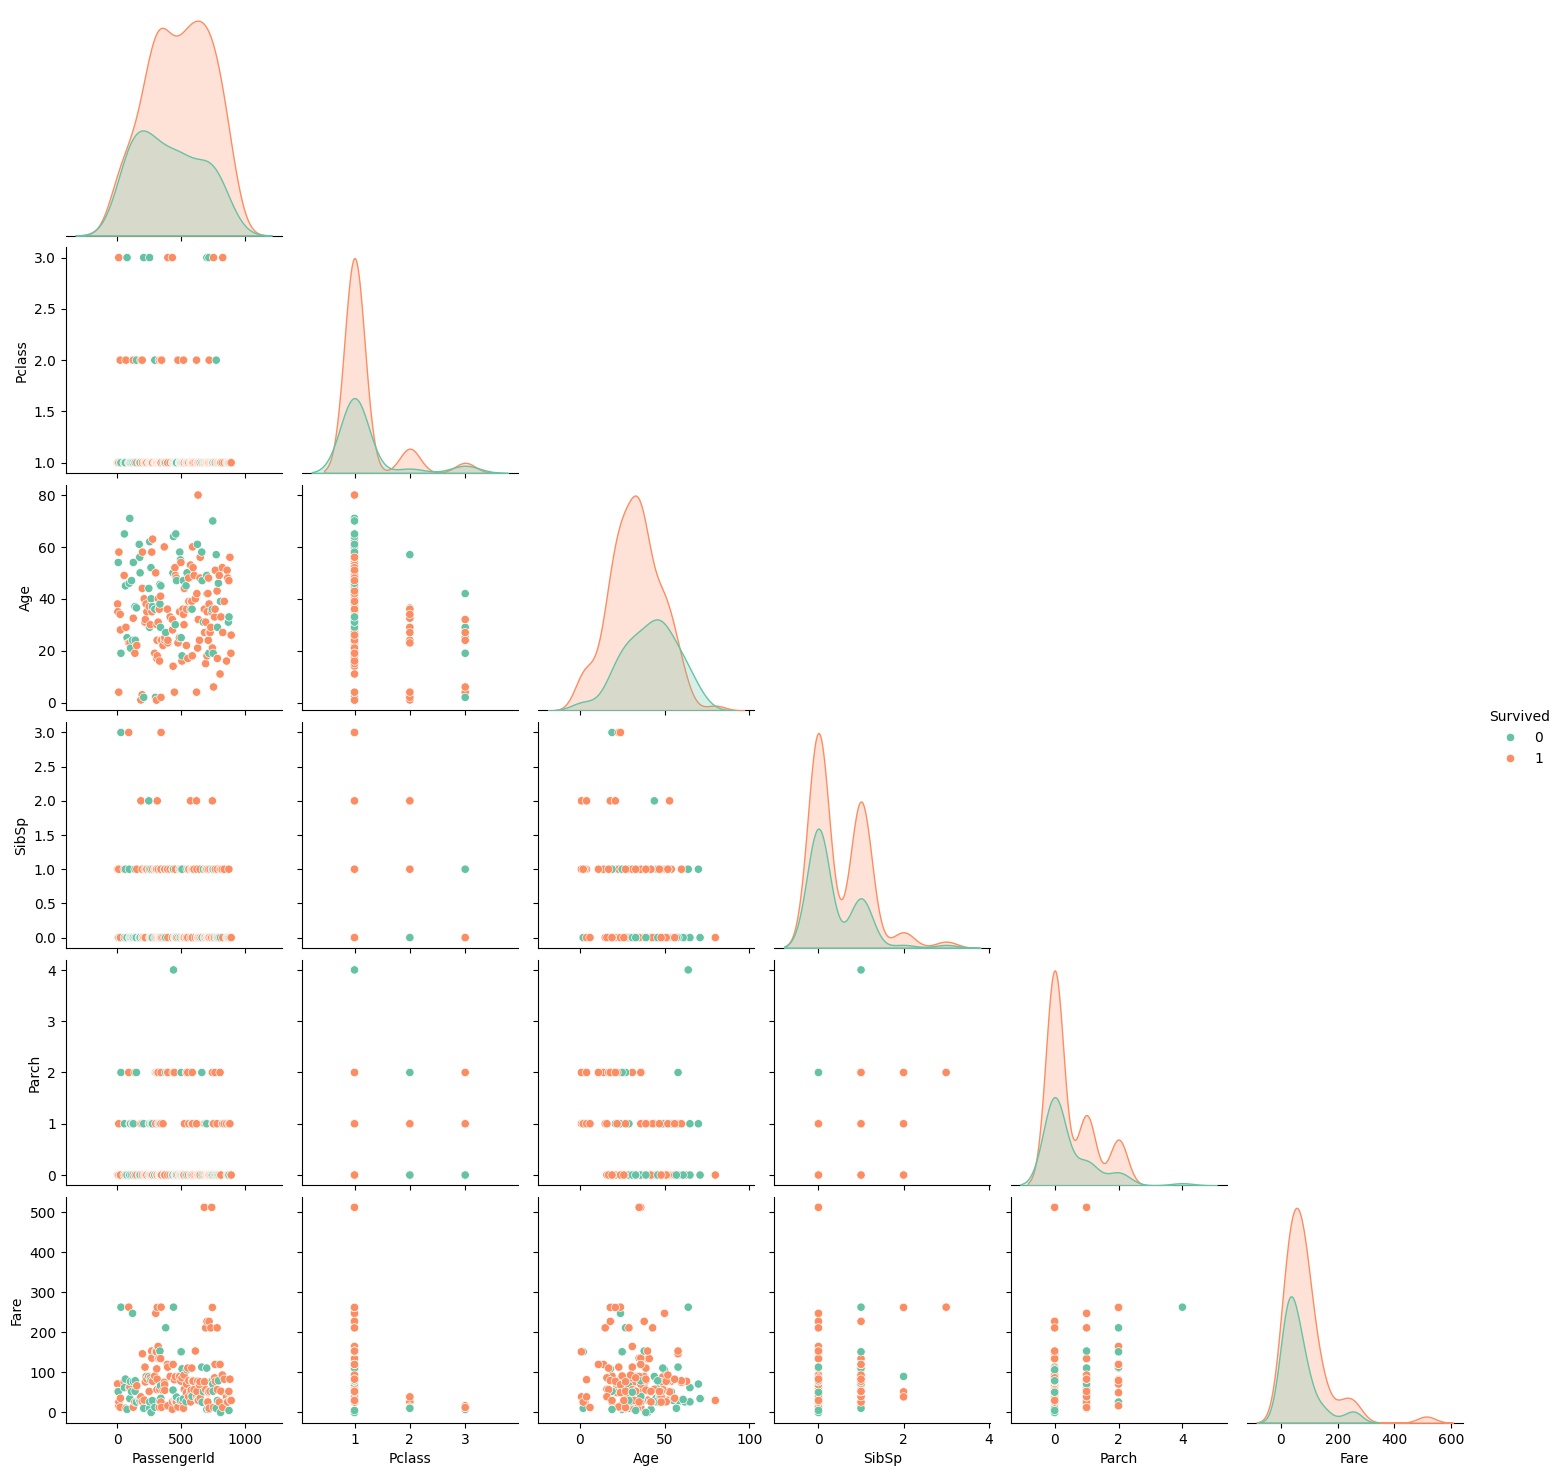

In [29]:
plt.figure(figsize=(1, 1))
sns.pairplot(data=df.dropna(), hue='Survived', diag_kind='kde', palette='Set2',
            corner=True)
plt.show()

Vamos tentar retirar alguma informação do ticket e da cabine:

### Cabine:

In [27]:
df_cabine = df.copy()
df_cabine = df.dropna()
df_cabine['Cabin'].head(10)

1             C85
3            C123
6             E46
10             G6
11           C103
21            D56
23             A6
27    C23 C25 C27
52            D33
54            B30
Name: Cabin, dtype: object

Tem como retirar esse número e classe? Vemos que algumas pessoas foram de uma cabine para outra.

In [30]:
import re

In [216]:
def separar_cabine(cabine:str):
    """
    Função para separar a cabine em letra e número.

    Returns:
    
    """
    if cabine is None or cabine is np.nan:
        return None, None
    tuple_letras = ()
    local_letras = []
    cabine = str(cabine)
    string_cabine = cabine
    cabine_numeros = []
    more_than_one = 0
    for i in range(len(cabine)):

        if not cabine[i].isdigit():
            tuple_letras += (cabine[i],)
            string_cabine = string_cabine.replace(cabine[i], ' ')
            more_than_one += 1
            try:
                cabine_numeros.append(cabine[i+1:])
            except IndexError:
                return None, -2

        
        cabine_numeros = string_cabine.split(' ')
        cabine_classes = set(list(tuple_letras))



  
    while '' in cabine_numeros:
        cabine_numeros.remove('')
    while ' ' in cabine_numeros:
        cabine_numeros.remove(' ')
    while '' in cabine_classes:
        cabine_classes.remove('')
    while ' ' in cabine_classes:
        cabine_classes.remove(' ')
    
    
    if more_than_one > 1:
        return 'MultiCabin', -1
    else:
        try:
            cabine_classes = list(cabine_classes)[0]
        except IndexError:
            cabine_classes = None
        try:
            cabine_numeros = list(cabine_numeros)[0]
        except IndexError:
            cabine_numeros = None

        #print(cabine_classes, cabine_numeros)
        return cabine_classes, cabine_numeros

    

            
        
        



In [209]:
separar_cabine('A123')

('A', '123')

In [217]:
import numpy as np

In [218]:
df_cabine_sample = df_cabine.sample(10)
df_cabine_sample[['Cabin_class', 'Cabin_number']] =  df_cabine_sample['Cabin'].apply(separar_cabine).to_list()
df_cabine_sample.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_class,Cabin_number
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C,D,20
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,D20,C,D,20
772,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5000,E77,S,E,77
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,B,80
310,311,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C,C,54


In [ ]:
df_cabine_processed['Cabin'].apply(separar_cabine).to_list()

In [215]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [219]:
df_cabine_processed = df.copy()
df_cabine_processed[['Cabin_class', 'Cabin_number']] = df_cabine_processed['Cabin'].apply(separar_cabine).to_list()
df_cabine_processed = df_cabine_processed.drop(columns=['Cabin'])
df_cabine_processed.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_class,Cabin_number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,None,None
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,None,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C,123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,None,None
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,None,None
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,E,46
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,None,None
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,None,None
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,None,None


In [220]:
df_2 = df_cabine_processed.copy()

### Tirando info de ticket

Sequer tem corr? Vamos remover.

### CORR
Esse gráfico é importante e foi dado na aula.

<Axes: >

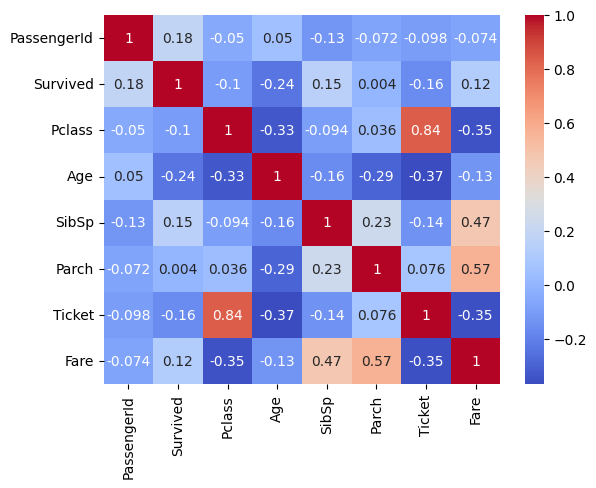

In [224]:
df_ticket_1 = df_2.copy()
df_ticket_1['Ticket'] =  df_ticket_1.Ticket.map(lambda x: x if x.isdigit() else np.nan)
df_ticket_1 = df_ticket_1.dropna()
df_ticket_1['Ticket'] = df_ticket_1['Ticket'].astype(int)
corr_ticket_1 = df_ticket_1.corr(numeric_only=True)
sns.heatmap(corr_ticket_1, annot=True, cmap='coolwarm')

Tem corr significativa. Infelizmente. Que informação são as letras do ticket?

In [239]:
I = 0
for lista in df_2.Ticket.map(lambda x: x.split(' ')).dropna():
    if len(lista) > 2:
        print(lista)
   # print(lista)
    I += 1
    if I > 100:
        break


split(' ') funciona bem o suficente.

In [288]:
def separar_ticket(ticket):
    if ticket is None or ticket is np.nan:
        return None, None
    ticket_lista = ticket.split(' ')
    if ticket.isdigit():
        return None, int(ticket)

    # Se len ainda é 1, significa que não tem espaço e não tem número
    if len(ticket_lista) == 1:
        ticket_lista = [ticket, None]
        return ticket_lista[0], ticket_lista[1]

    else:
        # Se len é 2, tem classe e número
        # Não podemos assumir que o segundo é sempre número:
        if ticket_lista[1].isdigit():
            ticket_lista = [ticket_lista[0], int(ticket_lista[1])]
        else:
            ticket_lista = [ticket_lista[0] + ticket_lista[1], None]
        return ticket_lista[0], ticket_lista[1]

In [289]:
df_ticket_processed = df_2.copy()
df_ticket_processed[['Ticket_class', 'Ticket_number']] = df_ticket_processed['Ticket'].apply(separar_ticket).to_list()
df_ticket_processed = df_ticket_processed.drop(columns=['Ticket'])
df_ticket_processed.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_class,Cabin_number,Ticket_class,Ticket_number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,None,None,A/5,21171.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C,85,PC,17599.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,None,None,STON/O2.,3101282.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,C,123,None,113803.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,None,None,None,373450.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,None,None,None,330877.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,E,46,None,17463.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,None,None,None,349909.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,None,None,None,347742.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,None,None,None,237736.0


<Axes: xlabel='Ticket_class', ylabel='Count'>

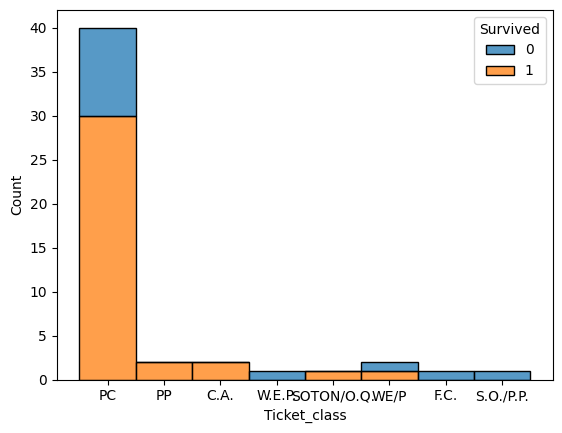

In [319]:
sns.histplot(data=df_ticket_processed.dropna(), x='Ticket_class', hue='Survived', multiple='stack')

Logo, não podemos deletar ticket. Suponha um modelo DecisionForest. if ticket_class == pp, survived = True. Bem simples. Não podemos remover.

In [291]:
df_3 = df_ticket_processed.copy()
df_3['Ticket_number'] = df_3['Ticket_number'].astype('float')
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Fare           891 non-null    float64
 9   Embarked       889 non-null    object 
 10  Cabin_class    204 non-null    object 
 11  Cabin_number   200 non-null    object 
 12  Ticket_class   230 non-null    object 
 13  Ticket_number  874 non-null    float64
dtypes: float64(3), int64(5), object(6)
memory usage: 97.6+ KB


<Axes: >

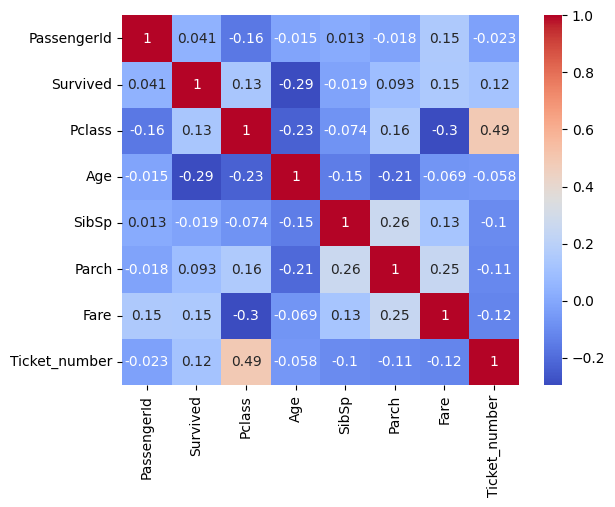

In [294]:
df_ticket_corr = df_3.dropna().corr(numeric_only=True)
sns.heatmap(df_ticket_corr, annot=True, cmap='coolwarm')

Ticket_number realmente não tem correlação. Mas ticket_class tem.

### Preprocessamento final
Vamos remover as colunas nome, passengerid, ticket_number.
Transformar PClass em classe.
Transformar SibSp e Parch em apenas uma.

Vamos fazer SibSp primeiro:

In [297]:
def aux_solo_func(value):
    """
    Pega a soma dos valores e retorna True caso seja 0. False caso seja maior que 0. Caso contrário, retorna None.
    """
    if value is None or value is np.nan:
        return None
    if value == 0:
        return True
    else:
        return False

In [300]:
df_acompanhada = df_3.copy()
df_acompanhada['Solo'] = df_acompanhada['SibSp'] + df_acompanhada['Parch']
df_acompanhada['Solo'] = df_acompanhada['Solo'].map(aux_solo_func)
df_acompanhada = df_acompanhada.drop(columns=['SibSp', 'Parch'])
df_acompanhada.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Cabin_class,Cabin_number,Ticket_class,Ticket_number,Solo
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,None,None,A/5,21171.0,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,C,85,PC,17599.0,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,None,None,STON/O2.,3101282.0,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,C,123,None,113803.0,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,None,None,None,373450.0,True


In [301]:
df_acompanhada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   Fare           891 non-null    float64
 7   Embarked       889 non-null    object 
 8   Cabin_class    204 non-null    object 
 9   Cabin_number   200 non-null    object 
 10  Ticket_class   230 non-null    object 
 11  Ticket_number  874 non-null    float64
 12  Solo           891 non-null    bool   
dtypes: bool(1), float64(3), int64(3), object(6)
memory usage: 84.5+ KB


In [302]:
df_4 = df_acompanhada.copy()

Vamos remover todas as outras colunas (Deveria ter feito isso primeiro, afinal, carregamos tudo isso na memória :) )

In [305]:
df_removido_colunas = df_4.copy()
df_removido_colunas = df_removido_colunas.drop(columns=['PassengerId', 'Name', 'Ticket_number'])
df_removido_colunas.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin_class,Cabin_number,Ticket_class,Solo
0,0,3,male,22.0,7.2500,S,None,None,A/5,False
1,1,1,female,38.0,71.2833,C,C,85,PC,False
2,1,3,female,26.0,7.9250,S,None,None,STON/O2.,True
3,1,1,female,35.0,53.1000,S,C,123,None,False
4,0,3,male,35.0,8.0500,S,None,None,None,True
5,0,3,male,NaN,8.4583,Q,None,None,None,True
6,0,1,male,54.0,51.8625,S,E,46,None,True
7,0,3,male,2.0,21.0750,S,None,None,None,False
8,1,3,female,27.0,11.1333,S,None,None,None,False
9,1,2,female,14.0,30.0708,C,None,None,None,False


Vamos dummificar PClass e Embarked:

In [413]:
df_5 = df_removido_colunas.copy()

# Aproveitar e mudar cabin_number para int:
df_5['Cabin_number'] = df_5['Cabin_number'].astype('float')
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Sex           891 non-null    object 
 3   Age           714 non-null    float64
 4   Fare          891 non-null    float64
 5   Embarked      889 non-null    object 
 6   Cabin_class   204 non-null    object 
 7   Cabin_number  200 non-null    float64
 8   Ticket_class  230 non-null    object 
 9   Solo          891 non-null    bool   
dtypes: bool(1), float64(3), int64(2), object(4)
memory usage: 63.6+ KB


In [406]:
df_5.dropna().Ticket_class.values

array(['PC', 'PP', 'PC', 'C.A.', 'W.E.P.', 'PC', 'PC', 'PC', 'PC', 'PC',
       'PC', 'PC', 'PC', 'PC', 'PC', 'PC', 'PC', 'PC', 'PC', 'PC', 'PC',
       'PC', 'PP', 'SOTON/O.Q.', 'PC', 'PC', 'C.A.', 'WE/P', 'PC', 'PC',
       'PC', 'PC', 'PC', 'PC', 'F.C.', 'PC', 'PC', 'PC', 'PC', 'PC', 'PC',
       'PC', 'PC', 'PC', 'WE/P', 'S.O./P.P.', 'PC', 'PC', 'PC', 'PC'],
      dtype=object)

### 

Precisamos preprocessar ticket_class ainda, dummies dele tá dando muito grande

In [439]:
def processar_ticket(ticket_class):
    if ticket_class is None or ticket_class is np.nan:
        return None
    if re.sub(r'[^A-Za-z\s]', '', ticket_class).upper()[:2] == 'SO':
        ticket_class = 'ST'
    return re.sub(r'[^A-Za-z\s]', '', ticket_class).upper()[:2]

In [445]:
df_6 = df_5.copy()
df_6['Ticket_class'] = df_6.Ticket_class.map(processar_ticket)
len(df_6.dropna(subset='Ticket_class').Ticket_class.value_counts())

15

In [441]:
df_6.dropna(subset='Ticket_class').Ticket_class.value_counts()

Ticket_class
PC    60
ST    45
CA    42
A     28
SC    17
WC    10
FC     6
C      5
PP     5
LI     4
WE     3
SW     2
SP     1
FA     1
AS     1
Name: count, dtype: int64

<Axes: xlabel='Ticket_class', ylabel='Count'>

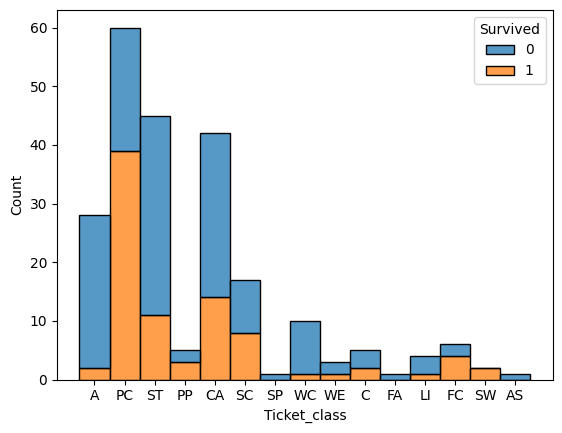

In [460]:
sns.histplot(data=df_6, x='Ticket_class', hue='Survived', multiple='stack')

In [442]:
pclass_dummies = pd.get_dummies(df_6.Pclass, prefix='Pclass')
embarked_dummies = pd.get_dummies(df_6.Embarked, prefix='Embarked')
cabin_class_dummies = pd.get_dummies(df_6.Cabin_class, prefix='Cabin_class')
sex_dummies = pd.get_dummies(df_6.Sex)
ticket_class_dummies = pd.get_dummies(df_6.Ticket_class, prefix='Ticket_class')

df_dummies_included = df_6.copy()
df_dummies_included = df_dummies_included.join(pclass_dummies)
df_dummies_included = df_dummies_included.join(embarked_dummies)
df_dummies_included = df_dummies_included.join(cabin_class_dummies)
df_dummies_included = df_dummies_included.join(sex_dummies)
df_dummies_included = df_dummies_included.join(ticket_class_dummies)
df_dummies_included = df_dummies_included.drop(columns=['Pclass', 'Embarked', 'female', 'Cabin_class', 'Ticket_class', 'Sex'])
df_dummies_included.head(10)

,Survived,Age,Fare,Cabin_number,Solo,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,...,Ticket_class_FC,Ticket_class_LI,Ticket_class_PC,Ticket_class_PP,Ticket_class_SC,Ticket_class_SP,Ticket_class_ST,Ticket_class_SW,Ticket_class_WC,Ticket_class_WE
0,0,22.0,7.2500,NaN,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,38.0,71.2833,85.0,False,True,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
2,1,26.0,7.9250,NaN,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,1,35.0,53.1000,123.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,35.0,8.0500,NaN,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5,0,NaN,8.4583,NaN,True,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
6,0,54.0,51.8625,46.0,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,0,2.0,21.0750,NaN,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
8,1,27.0,11.1333,NaN,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9,1,14.0,30.0708,NaN,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [444]:
df_7 = df_dummies_included.copy()

In [318]:
#df_dummies_included_corr = df_dummies_included.corr(numeric_only=True)
#plt.figure(figsize=(45, 45))
#sns.heatmap(df_dummies_included_corr, annot=True, cmap='coolwarm')
#plt.tight_layout()
#plt.show()

### Lidando com NaNs

In [382]:
from sklearn.impute import KNNImputer

In [446]:
impute = KNNImputer(n_neighbors=5, weights='distance')
df_imputed = df_7.copy()
df_imputed.head()


,Survived,Age,Fare,Cabin_number,Solo,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,...,Ticket_class_FC,Ticket_class_LI,Ticket_class_PC,Ticket_class_PP,Ticket_class_SC,Ticket_class_SP,Ticket_class_ST,Ticket_class_SW,Ticket_class_WC,Ticket_class_WE
0,0,22.0,7.2500,NaN,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,38.0,71.2833,85.0,False,True,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
2,1,26.0,7.9250,NaN,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,1,35.0,53.1000,123.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,35.0,8.0500,NaN,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [448]:
df_imputed = impute.fit_transform(df_imputed)
df_imputed = pd.DataFrame(df_imputed, columns=df_7.columns)

In [388]:
df_imputed

,Survived,Age,Fare,Cabin_number,Solo,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,...,Ticket_class_SO/C,Ticket_class_SOTON/O.Q.,Ticket_class_SOTON/O2,Ticket_class_SOTON/OQ,Ticket_class_STON/O2.,Ticket_class_SW/PP,Ticket_class_W./C.,Ticket_class_W.E.P.,Ticket_class_W/C,Ticket_class_WE/P
0,0.0,22.000000,7.2500,36.381249,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,38.000000,71.2833,85.000000,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,26.000000,7.9250,33.468224,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,35.000000,53.1000,123.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,35.000000,8.0500,33.713090,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,27.000000,13.0000,83.630428,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
887,1.0,19.000000,30.0000,42.000000,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,0.0,21.304219,23.4500,17.605143,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
889,1.0,26.000000,30.0000,148.000000,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [389]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 64 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 891 non-null    float64
 1   Age                      891 non-null    float64
 2   Fare                     891 non-null    float64
 3   Cabin_number             891 non-null    float64
 4   Solo                     891 non-null    float64
 5   Pclass_1                 891 non-null    float64
 6   Pclass_2                 891 non-null    float64
 7   Pclass_3                 891 non-null    float64
 8   Embarked_C               891 non-null    float64
 9   Embarked_Q               891 non-null    float64
 10  Embarked_S               891 non-null    float64
 11  Cabin_class_A            891 non-null    float64
 12  Cabin_class_B            891 non-null    float64
 13  Cabin_class_C            891 non-null    float64
 14  Cabin_class_D            8

In [390]:
df_imputed.isna().any().any()

np.False_

In [451]:
df_final = df_imputed.copy()

### Train e Test Split

Na aula foi explicado o conceito de testes e treino.

Precisamos treinar um modelo em dados, e também testar para ver se o modelo é bom ou não.

Temos sim uma parte do dataset já separada pra test, mas esse é apenas para validação final, e não deve ser usado aqui. 

Então, separamos os dados só para treino em duas partes: de teste, e de treino. Abaixo é como se faz isso:

### Por train_test_split

In [456]:
from sklearn.model_selection import train_test_split

In [ ]:
X_vars = df_final.drop(columns=['Survived'])
y_vars = df_final['Survived']

x_train, x_test, y_train, y_test = train_test_split(X_vars, y_vars, test_size=0.2,  # Indica que queremos que o teste seja 20% do tamanho total
                                                    random_state=123) # Esse argumento apenas especifica a aleatoriedade da separação.

In [458]:
x_train

,Age,Fare,Cabin_number,Solo,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,...,Ticket_class_FC,Ticket_class_LI,Ticket_class_PC,Ticket_class_PP,Ticket_class_SC,Ticket_class_SP,Ticket_class_ST,Ticket_class_SW,Ticket_class_WC,Ticket_class_WE
329,16.0,57.9792,18.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
749,31.0,7.7500,23.794692,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203,45.5,7.2250,50.562311,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421,21.0,7.7333,30.947490,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,23.0,63.3583,-1.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,34.0,23.0000,28.237106,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
322,30.0,12.3500,80.033428,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
382,32.0,7.9250,17.934689,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
365,30.0,7.2500,19.807247,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


A parte de baixo não foi dada na aula, pode ignorar.

### Por kfold

In [450]:
from sklearn.model_selection import KFold

In [452]:
X_vars = df_final.drop(columns=['Survived'])
y_vars = df_final['Survived']


In [455]:
kf = KFold(n_splits=5, shuffle=True)
splits = kf.split(X_vars)